In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from itertools import product

In [80]:
# carregando os dados
df = pd.read_excel('Dados_Peso_Curso_IA.xlsx')
df.head()

,matr_aluno,idade,altura (cm),sexo,peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes,polo
0,20242510284,50,177,M,91,7,4,45,1,12,2,4,4,Vila Velha
1,20242510285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20242510286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20242510287,35,169,M,74,7,0,0,1,12,2,5,2,Cachoeiro de Itapemirim
4,20242510288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Verificando dados nulos
df.isnull().sum()

matr_aluno         1
idade             49
altura (cm)       49
sexo              49
peso (kg)         49
sono_h            49
exercicio_dias    49
exercicio_min     49
alimentacao       49
sedentario_h      49
agua_L            49
cafe_xic          49
refeicoes         49
polo              49
dtype: int64

In [82]:
# Verificando a quantoidade de linhas e colunas
df.shape

(189, 14)

In [83]:
# Verificando as variaveis Numericas
df.describe()

,matr_aluno,idade,altura (cm),peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes
count,188,140,140,140,140,140,140,140,140,140,140,140
mean,20242510377,35,174,84,7,3,51,1,10,2,2,4
std,55,8,8,19,1,2,29,0,2,1,2,1
min,20242510284,22,155,52,3,0,0,1,3,1,0,2
25%,20242510329,29,170,72,6,2,40,1,8,2,1,3
50%,20242510374,34,174,82,7,3,60,1,10,2,2,4
75%,20242510424,39,179,95,8,5,60,1,12,3,4,4
max,20242510474,62,197,180,10,7,180,3,16,6,10,7


In [84]:
# verificando os tipos dos dados
df.dtypes

matr_aluno        float64
idade             float64
altura (cm)       float64
sexo               object
peso (kg)         float64
sono_h            float64
exercicio_dias    float64
exercicio_min     float64
alimentacao       float64
sedentario_h      float64
agua_L            float64
cafe_xic          float64
refeicoes         float64
polo               object
dtype: object

In [85]:
# Verificando dados nulos
df.isnull().sum()

matr_aluno         1
idade             49
altura (cm)       49
sexo              49
peso (kg)         49
sono_h            49
exercicio_dias    49
exercicio_min     49
alimentacao       49
sedentario_h      49
agua_L            49
cafe_xic          49
refeicoes         49
polo              49
dtype: int64

In [87]:
# Remover observações inconsistentes ou outliers
#remover valores nulos e outliers baseados no z-score
df_cleaned = df.dropna()
z_scores = np.abs((df_cleaned.select_dtypes(include=[np.number]) - df_cleaned.select_dtypes(include=[np.number]).mean()) / df_cleaned.select_dtypes(include=[np.number]).std())
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]


In [88]:
# verificando a quantidade de linhas e colunas após a limpeza
df_cleaned.shape

(122, 14)

In [89]:
# Verificar correlações entre variáveis explicativas
numeric_df_cleaned = df_cleaned.select_dtypes(include=[np.number])  # Excluir colunas não numéricas
correlation_matrix = numeric_df_cleaned.corr() # Calcular a matriz de correlação



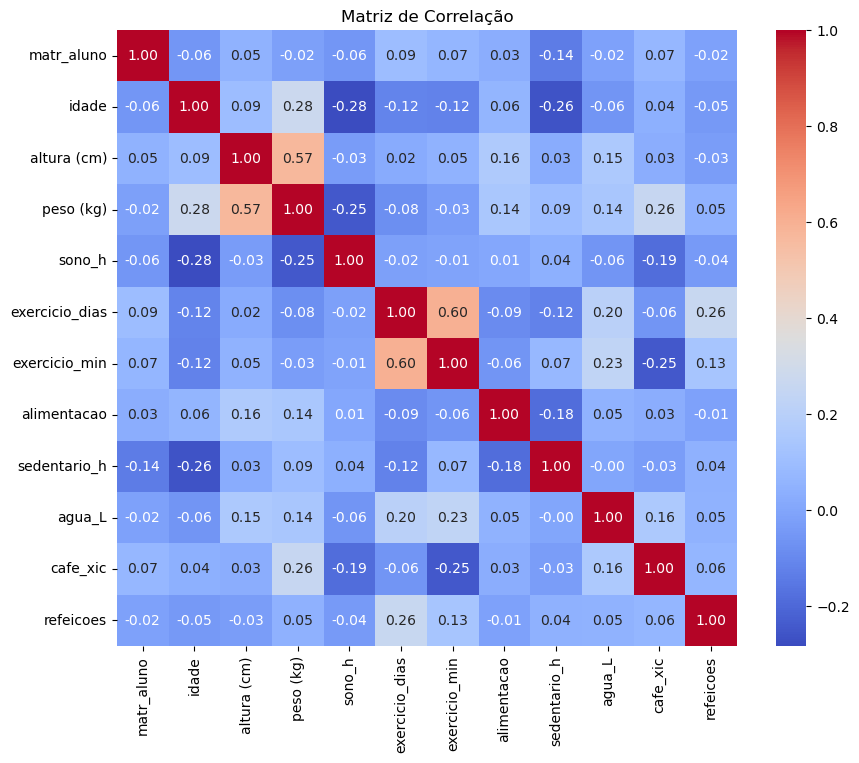

In [90]:
# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [91]:
# Analisar correlação entre a variável resposta (peso) e as variáveis explicativas
response_correlation = correlation_matrix['peso (kg)'].sort_values(ascending=False)
print("\nCorrelação com a variável resposta (peso):")
print(response_correlation)


Correlação com a variável resposta (peso):
peso (kg)         1
altura (cm)       1
idade             0
cafe_xic          0
alimentacao       0
agua_L            0
sedentario_h      0
refeicoes         0
matr_aluno       -0
exercicio_min    -0
exercicio_dias   -0
sono_h           -0
Name: peso (kg), dtype: float64


In [92]:
# Filtrar variáveis com correlação forte (positiva ou negativa)
strong_response_correlation = response_correlation[response_correlation.abs() > 0.5]

print("\nVariáveis mais relevantes para o peso:")
print(strong_response_correlation)


Variáveis mais relevantes para o peso:
peso (kg)     1
altura (cm)   1
Name: peso (kg), dtype: float64


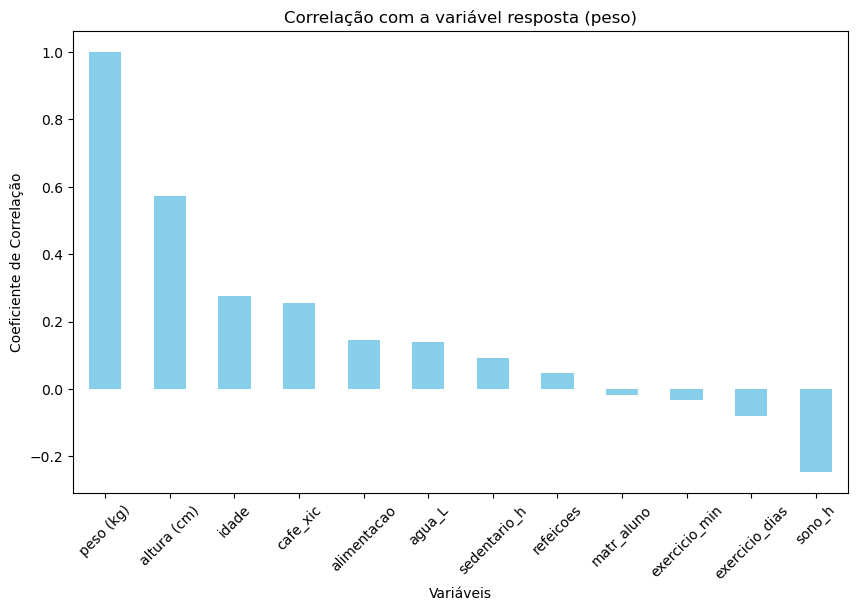

In [93]:
# Visualizar as correlações com a variável resposta
plt.figure(figsize=(10, 6))
response_correlation.plot(kind='bar', color='skyblue')
plt.title("Correlação com a variável resposta (peso)")
plt.ylabel("Coeficiente de Correlação")
plt.xlabel("Variáveis")
plt.xticks(rotation=45)
plt.show()

In [99]:
# Separar a variável resposta (peso)
X = numeric_df_cleaned.drop(columns=['peso (kg)'])  # Variáveis explicativas
y = numeric_df_cleaned['peso (kg)']  # Variável resposta


Resultados de validação (MAE) por modelo:

Ridge Regression:
  Média: 9.4735
  Desvio Padrão: 2.2637
  MAEs por fold: [11.710549475138006, 9.41852955864026, 12.214970263838767, 11.802237868309021, 5.893830716113249, 7.217389250174165, 9.114056388537088, 6.665359904368718, 12.058789554983377, 8.639321036140124]

Lasso Regression:
  Média: 9.1649
  Desvio Padrão: 1.9251
  MAEs por fold: [10.677280583863077, 9.320479477827366, 12.288834212223689, 11.010089348305357, 6.051462783912817, 7.24647641616563, 9.142035022377968, 6.663365930318832, 10.499418592701355, 8.749547593792279]

Random Forest Regression:
  Média: 9.6870
  Desvio Padrão: 2.4245
  MAEs por fold: [11.56398321858084, 11.265846153846157, 11.855122725374038, 12.043041666666667, 5.306541666666662, 9.34386153982882, 9.367237417708607, 5.8706426406926395, 12.146147001217395, 8.107357900821947]


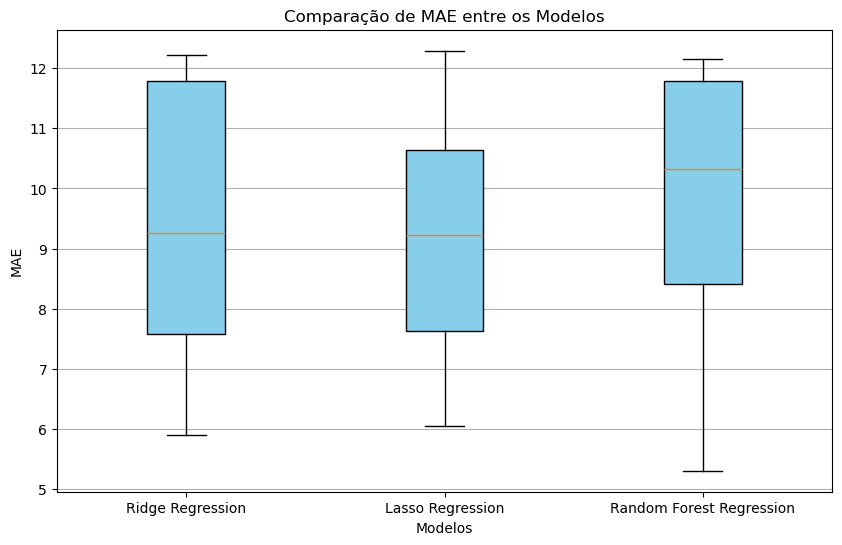


Hiperparâmetros mais frequentes por modelo:
Ridge Regression: {'alpha': 100.0}
Lasso Regression: {'alpha': 0.01}
Random Forest Regression: {'n_estimators': 200, 'max_depth': 5}


In [114]:
# Configurar o k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Criar os modelos e hiperparâmetros para ajuste
model_params = {
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.1, 1.0, 10.0, 100.0]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.01, 0.1, 1.0, 10.0]}
    },
    "Random Forest Regression": {
        "model": RandomForestRegressor(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 20]}
    }
}

# Armazenar os resultados
results = {model_name: [] for model_name in model_params.keys()}
best_params_per_fold = {model_name: [] for model_name in model_params.keys()}

# Ajustar os modelos usando k-fold cross-validation
for model_name, config in model_params.items():
    model = config["model"]
    param_grid = config["params"]

    # Executar o k-fold cross-validation
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        best_mae = float('inf')
        best_params = None

        # Testar todas as combinações de hiperparâmetros
        for params in [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]:
            model.set_params(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)

            # Atualizar os melhores hiperparâmetros para este fold
            if mae < best_mae:
                best_mae = mae
                best_params = params

        # Armazenar o melhor MAE e os hiperparâmetros para este fold
        results[model_name].append(best_mae)
        best_params_per_fold[model_name].append(best_params)

# Exibir os resultados
print("Resultados de validação (MAE) por modelo:")
for model_name, maes in results.items():
    print(f"\n{model_name}:")
    print(f"  Média: {np.mean(maes):.4f}")
    print(f"  Desvio Padrão: {np.std(maes):.4f}")
    print(f"  MAEs por fold: {maes}")

# Criar boxplots dos erros
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys(), patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Comparação de MAE entre os Modelos")
plt.ylabel("MAE")
plt.xlabel("Modelos")
plt.grid(axis='y')
plt.show()

# Exibir os hiperparâmetros mais frequentes
print("\nHiperparâmetros mais frequentes por modelo:")
for model_name, params_list in best_params_per_fold.items():
    params_df = pd.DataFrame(params_list)
    most_frequent_params = params_df.mode().iloc[0].to_dict()
    print(f"{model_name}: {most_frequent_params}")

Os resultados fornecem uma análise detalhada do desempenho dos modelos Ridge Regression, Lasso Regression e Random Forest Regression com base no Mean Absolute Error (MAE) em um processo de validação cruzada (k-fold). Aqui está a interpretação:

1. Ridge Regression

Média do MAE: 9.4735

Desvio Padrão: 2.2637

MAEs por fold: Variam de 5.89 a 12.21.

Hiperparâmetro mais frequente: alpha = 100.0

Análise:

O modelo Ridge Regression apresentou um desempenho consistente, com uma média de erro de 9.47.

O desvio padrão de 2.26 indica uma variabilidade moderada entre os folds.

O hiperparâmetro alpha = 100.0 foi o mais frequente, indicando que uma regularização mais forte foi benéfica para este modelo.

2. Lasso Regression

Média do MAE: 9.1649

Desvio Padrão: 1.9251

MAEs por fold: Variam de 6.05 a 12.28.

Hiperparâmetro mais frequente: alpha = 0.01

Análise:

O modelo Lasso Regression teve o menor MAE médio (9.16), indicando que foi o modelo mais preciso em geral.

O desvio padrão de 1.92 é o menor entre os modelos, sugerindo que o Lasso foi o mais consistente.

O hiperparâmetro alpha = 0.01 foi o mais frequente, indicando que uma regularização leve foi suficiente para este modelo.

3. Random Forest Regression

Média do MAE: 9.6870

Desvio Padrão: 2.4245

MAEs por fold: Variam de 5.30 a 12.14.

Hiperparâmetros mais frequentes: n_estimators = 200, max_depth = 5

Análise:

O modelo Random Forest Regression teve o maior MAE médio (9.69), indicando que foi o menos preciso entre os três.

O desvio padrão de 2.42 é o maior, sugerindo maior variabilidade no desempenho entre os folds.

Os hiperparâmetros mais frequentes (n_estimators = 200, max_depth = 5) indicam que um número maior de árvores e uma profundidade limitada foram mais eficazes.

4. Comparação Geral

Melhor modelo: O Lasso Regression apresentou o menor MAE médio (9.16) e a menor variabilidade (desvio padrão de 1.92), tornando-o o modelo mais confiável.

Consistência: O Lasso Regression também foi o mais consistente, com menor dispersão nos erros entre os folds.

Random Forest: Apesar de ser um modelo não linear, o Random Forest teve desempenho inferior, possivelmente devido à limitação de profundidade (max_depth = 5).

5. Interpretação do Boxplot

O boxplot mostra a distribuição dos erros (MAE) para cada modelo:


Ridge Regression:

A mediana está próxima da média (9.47), indicando uma distribuição equilibrada.

Há alguns folds com erros mais altos (outliers), como 12.21.

Lasso Regression:

A mediana é a menor entre os modelos, confirmando que o Lasso teve o melhor desempenho geral.

A dispersão é menor, indicando consistência.

Random Forest Regression:

A mediana é maior que a do Lasso e Ridge, confirmando o desempenho inferior.

A dispersão é maior, com alguns folds apresentando erros baixos (5.30) e outros muito altos (12.14).

Conclusão

Modelo recomendado: O Lasso Regression é o modelo mais indicado, pois apresentou o menor MAE médio, menor desvio padrão e maior consistência.



In [115]:
# Treinando o modelo final com os hiperparâmetros mais frequentes
# Configurar o k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Hiperparâmetro mais frequente para Lasso Regression
best_alpha = 0.01

# Armazenar os erros de validação e teste
validation_maes = []
test_maes = []

# Dividir os dados em treino+validação e teste usando k-fold
for train_index, test_index in kf.split(X):
    X_train_val, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_val, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo com o hiperparâmetro mais frequente
    model = Lasso(alpha=best_alpha)
    model.fit(X_train_val, y_train_val)

    # Fazer previsões nos dados de teste
    y_pred_test = model.predict(X_test)

    # Calcular o MAE nos dados de teste
    mae_test = mean_absolute_error(y_test, y_pred_test)
    test_maes.append(mae_test)

# Exibir os resultados finais
print("Resultados de validação cruzada (k-fold) para o modelo final:")
print(f"  Média do MAE nos dados de teste: {np.mean(test_maes):.4f}")
print(f"  Desvio Padrão do MAE nos dados de teste: {np.std(test_maes):.4f}")
print(f"  MAEs por fold: {test_maes}")

Resultados de validação cruzada (k-fold) para o modelo final:
  Média do MAE nos dados de teste: 9.7371
  Desvio Padrão do MAE nos dados de teste: 2.3085
  MAEs por fold: [12.47409722690399, 9.785147701318447, 12.304053274790446, 12.319803905983767, 6.576780661443869, 7.24647641616563, 9.142035022377968, 6.668931191166242, 12.104376901562015, 8.749547593792279]


Análise dos Resultados

Os resultados da validação cruzada (k-fold) para o modelo final Lasso Regression com o hiperparâmetro alpha = 0.01 são os seguintes:

Média do MAE: 9.7371

Representa o erro médio absoluto nos dados de teste ao longo dos folds. Este valor indica que, em média, o modelo erra por aproximadamente 9.74 unidades na previsão.

Desvio Padrão do MAE: 2.3085

Mede a variabilidade do erro entre os folds. Um desvio padrão de 2.31 indica que o desempenho do modelo varia moderadamente entre os folds.

MAEs por fold:

Os erros individuais para cada fold variam de 6.57 (melhor desempenho) a 12.47 (pior desempenho). Isso sugere que o modelo pode ter dificuldades em alguns subconjuntos dos dados.

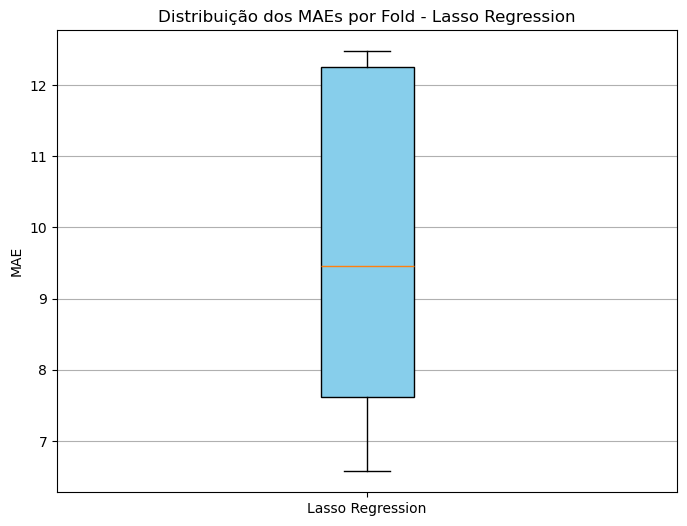

In [116]:
# Criar o boxplot dos MAEs por fold
plt.figure(figsize=(8, 6))
plt.boxplot([test_maes], labels=["Lasso Regression"], patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Distribuição dos MAEs por Fold - Lasso Regression")
plt.ylabel("MAE")
plt.grid(axis='y')
plt.show()

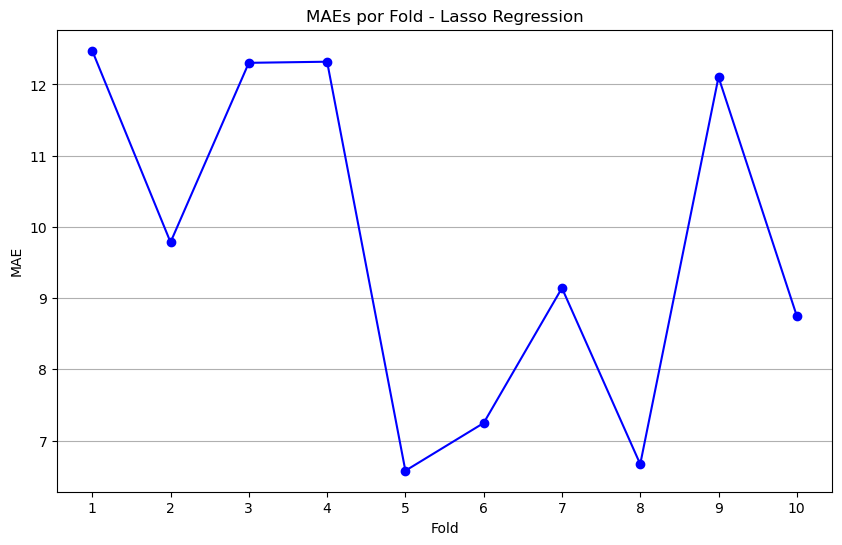

In [117]:
# Criar o gráfico de linha dos MAEs por fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(test_maes) + 1), test_maes, marker='o', linestyle='-', color='blue')
plt.title("MAEs por Fold - Lasso Regression")
plt.xlabel("Fold")
plt.ylabel("MAE")
plt.xticks(range(1, len(test_maes) + 1))
plt.grid(axis='y')
plt.show()

Interpretação dos Gráficos

Boxplot:

A mediana do MAE está próxima de 9.74, o que confirma a média calculada.

A presença de outliers (valores acima de 12) indica que o modelo teve dificuldades em alguns folds.

Gráfico de Linha:

Mostra a variação do MAE entre os folds.

Os folds com MAEs mais altos (como o fold 1 e o fold 4) podem indicar subconjuntos de dados mais difíceis de prever.

Conclusão

O modelo Lasso Regression apresentou um desempenho médio razoável, com um MAE médio de 9.7371.

A variabilidade entre os folds (desvio padrão de 2.3085) é moderada, mas alguns folds apresentaram erros significativamente maiores.